In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("C:/Users/Aditya/Desktop/black friday/train.csv")
test = pd.read_csv("C:/Users/Aditya/Desktop/black friday/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
from sklearn import preprocessing

In [5]:
lable_encoder = preprocessing.LabelEncoder() 

In [6]:
train['Age'] = lable_encoder.fit_transform(train['Age'])
train['Gender'] = lable_encoder.fit_transform(train['Gender'])
train['City_Category'] = lable_encoder.fit_transform(train['City_Category'])

In [7]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(0)
train['Product_Category_3'] = train['Product_Category_3'].fillna(0)

In [8]:
train['Product_Category_2'] = train['Product_Category_2'].astype('int')
train['Product_Category_3'] = train['Product_Category_3'].astype('int')

In [ ]:
train.head()

In [9]:
train['User_ID'] = train['User_ID'].astype('str')

In [10]:
train['User_product'] = train['User_ID'].str.cat(train['Product_ID'], sep = "-")

In [11]:
train['Marital_Status'] = train['Marital_Status'].astype('int')
train['Occupation'] = train['Occupation'].astype('int')
train['Gender'] = train['Gender'].astype('int')

In [12]:
dummy = pd.get_dummies(train['Stay_In_Current_City_Years'])

In [13]:
train = train.merge(dummy,left_index = True, right_index = True)

In [ ]:
train.head()

In [14]:
train.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'], axis = 1, inplace = True)

In [15]:
train1 = train.copy()

In [16]:
train.drop(['User_product'],axis = 1, inplace = True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot = True,fmt=".2f")

In [ ]:
train.shape

In [17]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder() 

In [18]:
test['Age'] = lable_encoder.fit_transform(test['Age'])
test['Gender'] = lable_encoder.fit_transform(test['Gender'])
test['City_Category'] = lable_encoder.fit_transform(test['City_Category'])

In [19]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(0)
test['Product_Category_3'] = test['Product_Category_3'].fillna(0)

In [20]:
test['Product_Category_2'] = test['Product_Category_2'].astype('int')
test['Product_Category_3'] = test['Product_Category_3'].astype('int')

In [21]:
test['User_ID'] = test['User_ID'].astype('str')

In [22]:
test['User_product'] = test['User_ID'].str.cat(test['Product_ID'], sep = "-")

In [23]:
test['Marital_Status'] = test['Marital_Status'].astype('int')
test['Occupation'] = test['Occupation'].astype('int')
test['Gender'] = test['Gender'].astype('int')

In [24]:
dummy = pd.get_dummies(test['Stay_In_Current_City_Years'])

In [25]:
test = test.merge(dummy,left_index = True, right_index = True)

In [26]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_product,0,1,2,3,4+
0,1000004,P00128942,1,4,7,1,2,1,1,11,0,1000004-P00128942,0,0,1,0,0
1,1000009,P00113442,1,2,17,2,0,0,3,5,0,1000009-P00113442,1,0,0,0,0
2,1000010,P00288442,0,3,1,1,4+,1,5,14,0,1000010-P00288442,0,0,0,0,1
3,1000010,P00145342,0,3,1,1,4+,1,4,9,0,1000010-P00145342,0,0,0,0,1
4,1000011,P00053842,0,2,1,2,1,0,4,5,12,1000011-P00053842,0,1,0,0,0


In [27]:
test.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'], axis = 1, inplace = True)

In [28]:
test1 = test.copy()

In [29]:
test.drop(['User_product'],axis = 1, inplace = True)

In [ ]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 10))
sns.heatmap(test.corr(), annot = True,fmt=".2f")

In [30]:
test['Purchase'] = 0

In [31]:
df = pd.concat([train,test], axis = 0,ignore_index=True)

In [ ]:
df

In [ ]:
train.shape

In [32]:
X_train = train.drop('Purchase', axis = 1)
y_train = train['Purchase']

In [ ]:
X_train.head()

In [33]:
X_test = test.drop('Purchase', axis = 1)
y_test = test['Purchase']

In [ ]:
X_test.shape

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(train.drop('Purchase', axis = 1),
#                                                    train['Purchase'], test_size =0.30,
 #                                                   random_state = 101)

## XGBoost:

In [ ]:
## hyper Parameter:
params = {
    "learning_rate":[0.05,0.1,0.15,0.2,0.25],
    "max_depth":[3,4,5,7,9],
    "min_child_weight":[1,3,5,7,9],
    "gamma":[0,0.1,0.2,0.3],
    "colsample_bytree":[0.3,0.4,0.5,0.6]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
reg = xgboost.XGBRegressor()

In [ ]:
random_search = RandomizedSearchCV(reg,param_distributions = params,
                                  n_iter = 10,scoring= 'neg_mean_absolute_error',
                                  n_jobs = -1,cv = 5, verbose = 3)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
random_search.best_params_

In [ ]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import max_error,mean_squared_error,r2_score

In [ ]:
pred = regressor.fit(X_train, y_train)

In [ ]:
pred1 = regressor.predict(X_test)

In [ ]:
pred1

In [ ]:
print('Max_Error :{} '.format(max_error(y_test,pred1)))
print('MSE :{}'.format(mean_squared_error(y_test,pred1)))
print('R2 :{} '.format(r2_score(y_test, pred1)))

In [ ]:
pred2 =pd.DataFrame(pred1)
sub_df = pd.read_csv("C:/Users/Aditya/Desktop/black friday/sample_submission_V9Inaty.csv")

In [ ]:
dataset  = pd.concat([sub_df,pred2], axis = 1)

In [ ]:
dataset

In [ ]:
dataset.to_csv("C:/Users/Aditya/Desktop/black friday/sample_submission_2.csv")

## Random Forest:

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
regressor = RandomForestRegressor()

In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# First create the base model to tune
rf = RandomForestRegressor()

In [46]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total= 2.8min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total= 3.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total= 2.7min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total= 2.9min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total= 2.9min
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=25, total= 4.1min
[CV] n_estimators=100, min_samples_split=10, min_s

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total= 5.5min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total= 6.1min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total= 6.1min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total= 5.4min
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=5, total= 4.5min
[CV] n_estimators=400, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 272.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [49]:
rf_random.best_score_

-8410318.17902199

In [50]:
predictions=rf_random.predict(X_test)

In [52]:
import seaborn as sns

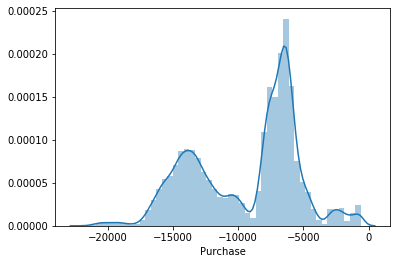

In [53]:
sns.distplot(y_test-predictions)

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9346.390162345966
MSE: 103829681.61457872
RMSE: 10189.685059636471


In [56]:
pred2 =pd.DataFrame(predictions)
sub_df = pd.read_csv("C:/Users/Aditya/Desktop/black friday/sample_submission_V9Inaty.csv")

In [57]:
dataset  = pd.concat([sub_df,pred2], axis = 1)

In [58]:
dataset.to_csv("C:/Users/Aditya/Desktop/black friday/sample_submission_rf_full.csv")